 # <div style="text-align: center">Shoot Outcome Prediction</div>

 ## <div style="text-align: center">Logistic Regression</div>

### Set Up

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
file_path = "/Users/ysadre/Desktop/NBA Expected Point/Data/"
df = pd.read_csv(file_path + "PredictIonProject.csv", delimiter=";")
df.head(10)

,player_name,CLOSEST_DEFENDER,PTS_TYPE,SHOT_DIST,SHOT_DIST^2/100,CLOSE_DEF_DIST,CLOSE_DEF_DIST.1,SHOT_RESULT
0,brian roberts,Anderson; Alan,2,77,59.29,13,1.69,1
1,brian roberts,Bogdanovic; Bojan,3,282,795.24,61,37.21,0
2,brian roberts,Bogdanovic; Bojan,2,101,102.01,9,0.81,0
3,brian roberts,Brown; Markel,2,172,295.84,34,11.56,0
4,brian roberts,Young; Thaddeus,2,37,13.69,11,1.21,0
5,brian roberts,Williams; Deron,2,184,338.56,26,6.76,0
6,brian roberts,Jack; Jarrett,2,207,428.49,61,37.21,0
7,brian roberts,Plumlee; Mason,2,35,12.25,21,4.41,1
8,brian roberts,Morris; Darius,3,246,605.16,73,53.29,0
9,brian roberts,Ellington; Wayne,3,224,501.76,198,392.04,0


In [31]:
df2 = df.drop(["player_name", "CLOSEST_DEFENDER"], axis = 1)
df2.head()
#X = df.iloc[:,2:8].values
#y = df.iloc[:,8:9].values

,PTS_TYPE,SHOT_DIST,SHOT_DIST^2/100,CLOSE_DEF_DIST,CLOSE_DEF_DIST.1,SHOT_RESULT
0,2,77,59.29,13,1.69,1
1,3,282,795.24,61,37.21,0
2,2,101,102.01,9,0.81,0
3,2,172,295.84,34,11.56,0
4,2,37,13.69,11,1.21,0


In [32]:
y = df2.loc[:, df2.columns == 'SHOT_RESULT']
X = df2.loc[:, df2.columns != 'SHOT_RESULT']

print(y)

        SHOT_RESULT
0                 1
1                 0
2                 0
3                 0
4                 0
...             ...
128064            0
128065            1
128066            1
128067            0
128068            1

[128069 rows x 1 columns]


### Model Fitting

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.660229
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.041      
Dependent Variable: SHOT_RESULT      AIC:              169119.6474
Date:               2022-02-04 18:27 BIC:              169168.4490
No. Observations:   128069           Log-Likelihood:   -84555.    
Df Model:           4                LL-Null:          -88183.    
Df Residuals:       128064           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
PTS_TYPE           0.1090   0.0079  13.8649 0.0000  0.0936  0.1244
SHOT_DIST         -0.0108   0.0003 -39.9889 0.0000 -0

In [34]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.660229
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.041      
Dependent Variable: SHOT_RESULT      AIC:              169119.6474
Date:               2022-02-04 18:27 BIC:              169168.4490
No. Observations:   128069           Log-Likelihood:   -84555.    
Df Model:           4                LL-Null:          -88183.    
Df Residuals:       128064           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
PTS_TYPE           0.1090   0.0079  13.8649 0.0000  0.0936  0.1244
SHOT_DIST         -0.0108   0.0003 -39.9889 0.0000 -0

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ysadre/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### Model Evaluation

In [36]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10306  3723]
 [ 6213  5372]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     14029
           1       0.59      0.46      0.52     11585

    accuracy                           0.61     25614
   macro avg       0.61      0.60      0.60     25614
weighted avg       0.61      0.61      0.60     25614



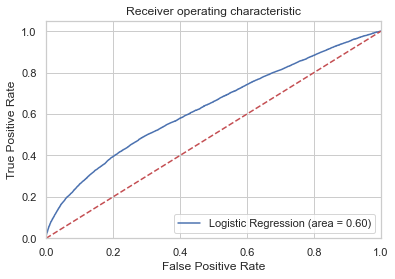

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()